In [53]:
import pandas as pd
import plotly.express as px
import numpy as np

In [54]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [55]:
df['Year'] = df['Date'].dt.year

# Group the data by 'Country' and 'Year' to get the number of top performances per country per year
country_year_data = df.groupby(['Country', 'Year']).size().reset_index(name='Count')
total_count_by_year = country_year_data.groupby('Year')['Count'].sum().reset_index(name='TotalCount')
total_count_by_year['Cumulative_TotalCount'] = total_count_by_year['TotalCount'].cumsum()

# print(country_year_data.head(10))

# Create a list to store the cumulative data DataFrames
cumulative_data_frames = []
# Get sorted unique years
unique_years = sorted(country_year_data['Year'].unique())

for year in unique_years:
    year_data = country_year_data[country_year_data['Year'] <= year]
    year_cumulative = year_data.groupby(['Country'])['Count'].sum().reset_index()
    year_cumulative['Year'] = year
    cumulative_data_frames.append(year_cumulative)
print(total_count_by_year)

    Year  TotalCount  Cumulative_TotalCount
0   1962           1                      1
1   1964           1                      2
2   1965           1                      3
3   1966           1                      4
4   1967           2                      6
5   1968          14                     20
6   1969           1                     21
7   1971           2                     23
8   1972          10                     33
9   1973           6                     39
10  1974          20                     59
11  1975           7                     66
12  1976          64                    130
13  1977          35                    165
14  1978          65                    230
15  1979          87                    317
16  1980         150                    467
17  1981          93                    560
18  1982         141                    701
19  1983         154                    855
20  1984         289                   1144
21  1985         194            

In [56]:
# Concatenate all the data frames in the list to create a single data frame with cumulative data
# cumulative_data = pd.merge(cumulative_data, total_count_by_year[['Year', 'Cumulative_TotalCount']], on='Year', how='left')
# cumulative_data['Cumulative_Percentage'] = (cumulative_data['Count'] / cumulative_data['Cumulative_TotalCount']) * 100

# print(cumulative_data.head(50))
cumulative_data = pd.concat(cumulative_data_frames)

In [57]:
colors = ['#ffffb2', '#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']

In [58]:
# # Convert matplotlib colormap to Plotly
# def matplotlib_to_plotly(cmap, pl_entries):
#     h = 1.0/(pl_entries-1)
#     pl_colorscale = []
    
#     for k in range(pl_entries):
#         C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
#         pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
#     return pl_colorscale

# # Apply the conversion function
# plotly_cmap = matplotlib_to_plotly(cmap, 100)

fig = px.choropleth(cumulative_data,
                    locations='Country',
                    locationmode='ISO-3',
                    color='Count',
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale=colors,
                    title='Cumulative Top Performances by Country Over the Years (Cumulative %)',
                   )

fig.update_geos(showcoastlines=True, coastlinecolor="White",
                showland=True, landcolor="black")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})


fig.update_geos(showcoastlines=True, coastlinecolor="White",
                showland=True, landcolor="white",
                showcountries=True, countrycolor="Lightgrey",)

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Step 4: Display the Map
fig.show()
# Step 5: Save the map as a HTML file
fig.write_html("choropleth_map.html")

In [59]:
import pandas as pd

# Reset the index and ensure 'Year' is only a column
cumulative_data = cumulative_data.reset_index(drop=True)

# Recalculate cumulative sum and percentages
cumulative_data['CumulativeCount'] = cumulative_data.groupby(['Country', 'Year'])[
    'Count'].cumsum()
cumulative_data['YearlyTotal'] = cumulative_data.groupby(
    'Year')['CumulativeCount'].transform('sum')
cumulative_data['Percentage'] = (
    cumulative_data['CumulativeCount'] / cumulative_data['YearlyTotal']) * 100

# Create the choropleth map with percentage data
fig = px.choropleth(cumulative_data,
                    locations='Country',
                    locationmode='ISO-3',
                    color='Percentage',  # Use the new percentage column
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale=colors,
                    title='Cumulative Top Performances by Country Over the Years (Cumulative %)',
                    range_color=[0, 100])  # Set the color scale range from 0 to 100%

# Update geos and layout
fig.update_geos(showcoastlines=True, coastlinecolor="White",
                showland=True, landcolor="white",
                showcountries=True, countrycolor="Lightgrey")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Display and save the map
fig.show()
fig.write_html("choropleth_map_percentage.html")

In [60]:
import plotly.express as px

# Filter the DataFrame for the selected countries
selected_countries = ['USA', 'KEN', 'ETH', 'RUS']
filtered_data = cumulative_data[cumulative_data['Country'].isin(
    selected_countries)]

# Create the line chart
fig = px.line(filtered_data,
              x='Year',
              y='Percentage',
              color='Country',
              title='Cumulative Performance by Year for Selected Countries')

# Display the chart
fig.show()

In [61]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame for the selected countries
selected_countries = ['USA', 'RUS', 'KEN', 'ETH']
filtered_data = cumulative_data[cumulative_data['Country'].isin(
    selected_countries)]

# Convert Year to Decade and format it
filtered_data['Decade'] = (filtered_data['Year'] // 10) * 10
filtered_data['Decade'] = filtered_data['Decade'].apply(lambda x: f"{int(x)}s")

# Exclude the 1960s
filtered_data = filtered_data[filtered_data['Decade'] != '1960s']

# Group data by Decade and Country
grouped_data = filtered_data.groupby(['Decade', 'Country']).agg({
    'Count': 'sum'}).reset_index()

# Normalize to percentage for each decade
grouped_data['TotalByDecade'] = grouped_data.groupby(
    'Decade')['Count'].transform('sum')
grouped_data['Percentage'] = (
    grouped_data['Count'] / grouped_data['TotalByDecade']) * 100

# Specify the order of countries
country_order = pd.Categorical(
    grouped_data['Country'], categories=selected_countries, ordered=True)
grouped_data['Country'] = country_order

# Create the bar chart
fig = px.bar(grouped_data,
             x='Decade',
             y='Percentage',
             color='Country',
             category_orders={"Country": selected_countries},
             barmode='group',
             title='Percentage of Cumulative Records by Country and Decade (Excluding 1960s)')

# Display the chart
fig.show()

C:\Users\Jonas\AppData\Local\Temp\ipykernel_16032\1203857136.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jonas\AppData\Local\Temp\ipykernel_16032\1203857136.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Temp\dataviz\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

C:\Users\Jonas\AppData\Local\Temp\ipykernel_16032\3897880507.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jonas\AppData\Local\Temp\ipykernel_16032\3897880507.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



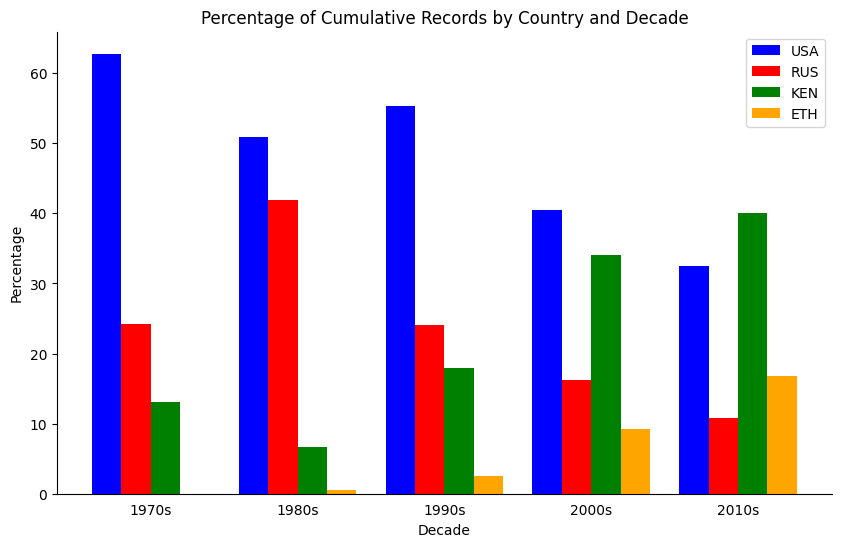

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Filter the DataFrame for the selected countries
selected_countries = ['USA', 'RUS', 'KEN', 'ETH']
filtered_data = cumulative_data[cumulative_data['Country'].isin(
    selected_countries)]

# Convert Year to Decade and format it
filtered_data['Decade'] = (filtered_data['Year'] // 10) * 10
filtered_data['Decade'] = filtered_data['Decade'].apply(lambda x: f"{int(x)}s")

# Exclude the 1960s
filtered_data = filtered_data[filtered_data['Decade'] != '1960s']

# Group data by Decade and Country
grouped_data = filtered_data.groupby(['Decade', 'Country']).agg({
    'Count': 'sum'}).reset_index()

# Normalize to percentage for each decade
grouped_data['TotalByDecade'] = grouped_data.groupby(
    'Decade')['Count'].transform('sum')
grouped_data['Percentage'] = (
    grouped_data['Count'] / grouped_data['TotalByDecade']) * 100

# Ensure every country has a record for each decade
pivot_data = grouped_data.pivot(
    index='Decade', columns='Country', values='Percentage').fillna(0)
pivot_data = pivot_data.reindex(columns=selected_countries)  # Reorder columns

# Create the bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Colors
colors = ['blue', 'red', 'green', 'orange'] # Colors often used for USA, RUS, KEN, ETH respectively

# Plotting
for i, country in enumerate(selected_countries):
    ax.bar(np.arange(len(pivot_data)) + i * bar_width,
           pivot_data[country],
           width=bar_width,
           label=country,
           color=colors[i])

# Set the x-ticks to be in the middle of the group of bars
ax.set_xticks(np.arange(len(pivot_data)) + bar_width *
              (len(selected_countries) - 1) / 2)
ax.set_xticklabels(pivot_data.index)

# Adding labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Percentage')
ax.set_title(
    'Percentage of Cumulative Records by Country and Decade')
# Despine the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=False,
               top=False, labelbottom=True)


# Add a legend
ax.legend()

# Show the plot
plt.show()